![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Redes Neuronales Recurrentes - LSTM

En este notebook aprenderá a construir y a entrenar redes neuronales recurrentes (LSTM), usando la librería [Keras](https://keras.io/).

Este notebook tiene una licencia de [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US).

## Instrucciones Generales

Este notebook esta compuesto por dos secciones. En la primera secciónn, usted beberá construir y entrenar un modelo de random forest para predecir si una URL es phishing (fraudulento) o no. En la segunda parte, usará el mismo dataset pero beberá construir y entrenar una red neuronal recurrente para ver las ganancias en predicción. En el siguente paper puede conocer más detalles de la base y del problema: *A. Correa Bahnsen, E. C. Bohorquez, S. Villegas, J. Vargas, and F. A. Gonzalez, “Classifying phishing urls using recurrent neural networks,” in Electronic Crime Research (eCrime), 2017 APWG Symposium on. IEEE, 2017, pp. 1–8*. https://albahnsen.com/wp-content/uploads/2018/05/classifying-phishing-urls-using-recurrent-neural-networks_cameraready.pdf
  
Para realizar la actividad, solo siga las indicaciones asociadas a cada celda del notebook. 

## Importar base de datos y librerías

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Importación librerías
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [9]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/phishing.csv')
data.head()

,url,phishing
0,http://www.subalipack.com/contact/images/sampl...,1
1,http://fasc.maximecapellot-gypsyjazz-ensemble....,1
2,http://theotheragency.com/confirmer/confirmer-...,1
3,http://aaalandscaping.com/components/com_smart...,1
4,http://paypal.com.confirm-key-21107316126168.s...,1


## Modelo Random Forest

In [11]:
# Preprocesamiento de texto (URLs) para crear variables predictoras

# Creación de columnas binarias que indican si la URL contiene la palabra clave (keywords)
keywords = ['https', 'login', '.php', '.html', '@', 'sign']
for keyword in keywords:
    data['keyword_' + keyword] = data.url.str.contains(keyword).astype(int)

# Definición de la variable largo de la URL
data['lenght'] = data.url.str.len() - 2

# Definición de la variable largo del dominio de la URL
domain = data.url.str.split('/', expand=True).iloc[:, 2]
data['lenght_domain'] = domain.str.len()

# Definición de la variable binaria que indica si es IP
data['isIP'] = (domain.str.replace('.', '') * 1).str.isnumeric().astype(int)

# Definicón de la variable cuenta de 'com' en la URL
data['count_com'] = data.url.str.count('com')

data.head()

,url,phishing,keyword_https,keyword_login,keyword_.php,keyword_.html,keyword_@,keyword_sign,lenght,lenght_domain,isIP,count_com
0,http://www.subalipack.com/contact/images/sampl...,1,0,0,0,0,0,0,47,18,0,1
1,http://fasc.maximecapellot-gypsyjazz-ensemble....,1,0,0,0,0,0,0,73,41,0,0
2,http://theotheragency.com/confirmer/confirmer-...,1,0,0,0,0,0,0,92,18,0,1
3,http://aaalandscaping.com/components/com_smart...,1,0,0,0,0,0,0,172,18,0,3
4,http://paypal.com.confirm-key-21107316126168.s...,1,0,0,0,0,0,0,90,50,0,1


In [13]:
# Definición de variables predictoras (X)
X = data.drop(['url', 'phishing'], axis=1)
# Definición de variable de interés (y)
y = data.phishing

In [15]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
# Definición de modelo de clasificación Random Forest
clf = RandomForestClassifier(n_jobs=-1, n_estimators=100)

# Entrenamiento del modelo de clasificación Random Forest usando el set de entrenamiento
clf.fit(X_train, y_train)

# Predicción del modelo de clasificación Random Forest usando el set de test
y_pred = clf.predict(X_test)

# Impresión del desempeño del modelo
print((y_pred == y_test).mean())

0.8011363636363636


## Red Neuronal Recurrente - LSTM

In [53]:
# Importación librerías
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.preprocessing import sequence
from livelossplot import PlotLossesKeras
%matplotlib inline

In [55]:
# Preprocesamiento de texto (URLs) para crear variables predictoras
X = data['url'].tolist()

# Definición de vocabulario
voc = set(''.join(X))
vocabulary = {x: idx + 1 for idx, x in enumerate(set(voc))}
vocabulary

{'<': 1,
 'U': 2,
 'W': 3,
 '0': 4,
 '^': 5,
 '4': 6,
 'ä': 7,
 ',': 8,
 '2': 9,
 '6': 10,
 '=': 11,
 'F': 12,
 '?': 13,
 'X': 14,
 'C': 15,
 'p': 16,
 'i': 17,
 't': 18,
 '3': 19,
 'n': 20,
 'H': 21,
 '/': 22,
 'O': 23,
 '|': 24,
 "'": 25,
 'E': 26,
 'v': 27,
 'J': 28,
 '5': 29,
 ')': 30,
 'm': 31,
 'o': 32,
 'V': 33,
 '(': 34,
 'M': 35,
 'a': 36,
 'b': 37,
 'Y': 38,
 'j': 39,
 'Q': 40,
 '+': 41,
 'K': 42,
 'D': 43,
 'S': 44,
 'w': 45,
 'B': 46,
 'h': 47,
 'r': 48,
 '*': 49,
 's': 50,
 'Z': 51,
 'q': 52,
 'T': 53,
 '¢': 54,
 '~': 55,
 '%': 56,
 'y': 57,
 '£': 58,
 'k': 59,
 '8': 60,
 '!': 61,
 'd': 62,
 '_': 63,
 '.': 64,
 '`': 65,
 'P': 66,
 'ü': 67,
 'I': 68,
 'g': 69,
 'A': 70,
 '>': 71,
 'l': 72,
 'u': 73,
 '�': 74,
 'c': 75,
 '1': 76,
 '&': 77,
 ';': 78,
 'L': 79,
 '$': 80,
 '¬': 81,
 'x': 82,
 '\n': 83,
 ' ': 84,
 'R': 85,
 'z': 86,
 '[': 87,
 '@': 88,
 ':': 89,
 '9': 90,
 '7': 91,
 '#': 92,
 '-': 93,
 'N': 94,
 'f': 95,
 'G': 96,
 'e': 97,
 ']': 98,
 '\\': 99}

In [57]:
# Definición máximo largo de embedding
max_url_len = 150

# Codificación (embedding) de la URL con el vocabulario definido anteriormente
X = [x[:max_url_len] for x in X]
X = [[vocabulary[x1] for x1 in x if x1 in vocabulary.keys()] for x in X]

In [38]:
# Definición de embedding con el largo máximo definido anteriormente
X_pad = sequence.pad_sequences(X, maxlen=max_url_len)
X_pad

array([[ 0,  0,  0, ..., 97, 22, 83],
       [ 0,  0,  0, ..., 18, 31, 83],
       [ 0,  0,  0, ..., 19, 22, 83],
       ...,
       [ 0,  0,  0, ..., 31, 72, 83],
       [ 0,  0,  0, ..., 19, 29, 83],
       [ 0,  0,  0, ...,  4, 19, 83]])

In [40]:
# Separación de variables predictoras (X_pad) y variable de interés (y) en set de entrenamiento y test usando la función train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.33, random_state=42)

In [42]:
# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa embedding
model.add(Embedding(len(vocabulary) + 1, 128, input_length=max_url_len))
# Definición de la capa recurrente LSTM
model.add(LSTM(32))
# Definición de dropout para evitar overfitting
model.add(Dropout(0.5))
# Definición capa densa con función sigmoide para predicción binaria final
model.add(Dense(1, activation='sigmoid'))

# Definición de función de perdida.
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Impresión de la arquitectura de la red neuronal
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

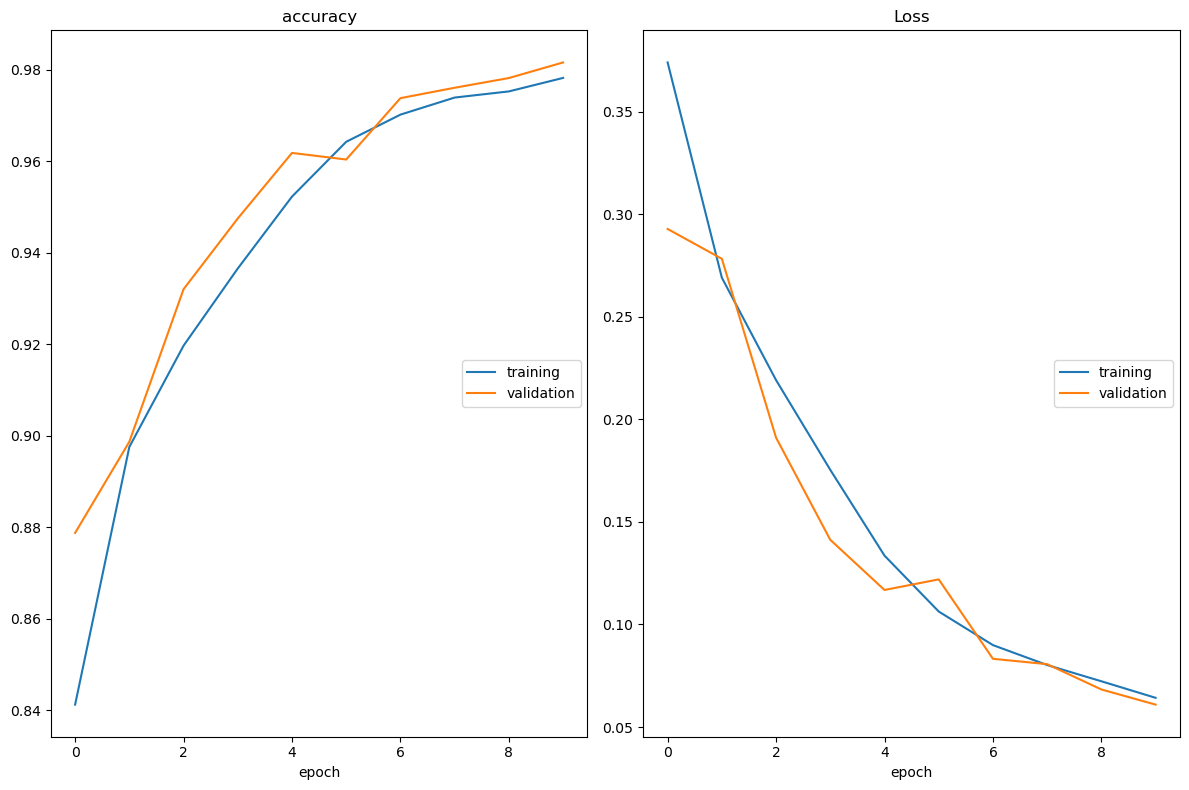

accuracy
	training         	 (min:    0.841, max:    0.978, cur:    0.978)
	validation       	 (min:    0.879, max:    0.982, cur:    0.982)
Loss
	training         	 (min:    0.064, max:    0.374, cur:    0.064)
	validation       	 (min:    0.061, max:    0.293, cur:    0.061)
210/210 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.9769 - loss: 0.0679 - val_accuracy: 0.9816 - val_loss: 0.0610


In [44]:
# Entrenamiento de la red neuronal usando el set de entrenamiento
model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          batch_size=128, epochs=10, verbose=1,
          callbacks=[PlotLossesKeras()])

In [45]:
# Predicción de la red neuronal usando el set de test
y_pred = model.predict(X_test)
y_pred = np.round(y_pred.flatten()).astype(int)

# Impresión del desempeño de la red neuronal
print((y_pred == y_test).mean())

413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
0.9815909090909091
